In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
data=pd.read_csv('measerr_scale_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y= data.iloc[:,0]
w= data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.32046020061592506
           A         B         C        D
0   1.195859  0.196453  45.32733  0.31478
1   1.170506  0.205177  44.51848  0.07224
2   1.032013  0.157972  44.32612  0.01430
3   0.917479  0.147812  44.69770  0.00526
4   0.877315  0.139783  44.30242  0.01505
..       ...       ...       ...      ...
65  1.032091  0.187493  44.54921  0.06313
66  1.160881  0.194522  44.65970  0.01427
67  0.993321  0.153457  44.79900  0.00287
68  1.043746  0.162104  44.18964  0.16066
69  1.082587  0.167039  44.25669  0.01856

[70 rows x 4 columns]


pendiente b1  -0.013941589317840428
intercepción b0 is 1.7204092728656226


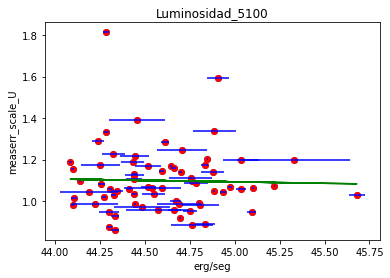

In [3]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_U')
plt.savefig("Luminosidad_5100_measerr_scale_U.pdf")

In [4]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.01394159]
 [ 0.00256949]
 [ 1.        ]]
Intercepción: [1.72040927 0.06789198 0.        ]
Errorcuadratico medio : 0.008166117633562708
Raiz del error cuadratico medio:  0.09036657365178072
 Coeficiente de determinacion R2 :  0.33397233070388754


In [5]:
data=pd.read_csv('measerr_scale_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w= data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3149958895049263
           A         B         C        D
0   1.041636  0.220427  45.32733  0.31478
1   1.022801  0.219710  44.51848  0.07224
2   1.115778  0.188678  44.32612  0.01430
3   0.917479  0.147812  44.69770  0.00526
4   0.877315  0.139783  44.30242  0.01505
..       ...       ...       ...      ...
76  1.113626  0.253562  44.36424  0.00708
77  1.009048  0.184411  44.17580  0.04911
78  1.138252  0.176201  44.40151  0.00523
79  1.171940  0.198775  44.20654  0.02390
80  1.238977  0.197372  44.59746  0.00671

[81 rows x 4 columns]


pendiente b1  0.042352027004976235
intercepción b0 is -0.7536280490122074


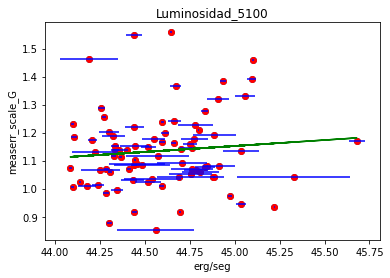

In [6]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_G')
plt.savefig("Luminosidad_5100_measerr_scale_G.pdf")

In [7]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.04235203]
 [0.0174199 ]
 [1.        ]]
Intercepción: [-7.53628049e-01 -5.62194652e-01  1.42108547e-14]
Errorcuadratico medio : 0.006639576875139021
Raiz del error cuadratico medio:  0.0814835988106749
 Coeficiente de determinacion R2 :  0.34598534797766245


In [8]:
data=pd.read_csv('measerr_scale_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.31399638095223986
0.1771718525435939
           A         B        C
0   1.142239  45.32733  0.31478
1   1.052054  44.51848  0.07224
2   1.153307  44.32612  0.01430
3   1.214880  44.69770  0.00526
4   1.410062  44.30242  0.01505
..       ...       ...      ...
79  1.289388  44.20654  0.02390
80  1.084152  44.59746  0.00671
81  1.323335  44.17015  0.06091
82  1.124980  44.31297  0.01773
83  1.193282  44.52867  0.01500

[84 rows x 3 columns]


pendiente b1  -0.057744788762795256
intercepción b0 is 3.7108549270579383


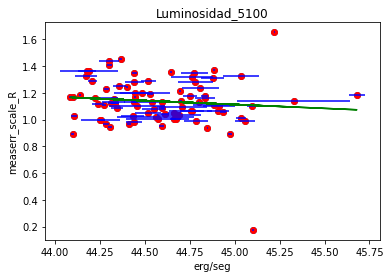

In [9]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_R')
plt.savefig("Luminosidad_5100_measerr_scale_R.pdf")

In [11]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.05774479]
 [ 1.        ]]
Intercepción: [3.71085493 0.        ]
Errorcuadratico medio : 0.015345666665766549
Raiz del error cuadratico medio:  0.1238776277855148
 Coeficiente de determinacion R2 :  0.5052366727018531


In [12]:
data=pd.read_csv('measerr_scale_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.31399638095223986
0.15315518197491781
           A         B        C
0   1.133457  45.32733  0.31478
1   1.160523  44.51848  0.07224
2   1.067083  44.32612  0.01430
3   1.167257  44.69770  0.00526
4   1.147959  44.30242  0.01505
..       ...       ...      ...
79  1.509390  44.20654  0.02390
80  1.316358  44.59746  0.00671
81  1.288756  44.17015  0.06091
82  0.968654  44.31297  0.01773
83  1.077684  44.52867  0.01500

[84 rows x 3 columns]


pendiente b1  0.013462542105388234
intercepción b0 is 0.5932351393321977


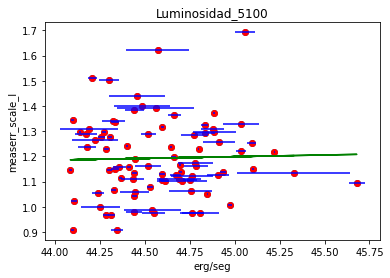

In [13]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_I')
plt.savefig("Luminosidad_5100_measerr_scale_I.pdf")

In [15]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.01346254]
 [1.        ]]
Intercepción: [0.59323514 0.        ]
Errorcuadratico medio : 0.011579804599288736
Raiz del error cuadratico medio:  0.10760950050664084
 Coeficiente de determinacion R2 :  0.5003808991884069


In [16]:
data=pd.read_csv('measerr_scale_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.3160503023091078
0.1534460963670065
           A         B        C
0   1.128665  45.32733  0.31478
1   0.928674  44.51848  0.07224
2   1.128355  44.32612  0.01430
3   1.291580  44.69770  0.00526
4   0.993960  44.30242  0.01505
..       ...       ...      ...
74  1.113575  44.78145  0.09942
75  1.195405  44.77507  0.07369
76  1.072265  44.36424  0.00708
77  1.027135  44.17580  0.04911
78  1.103926  44.40151  0.00523

[79 rows x 3 columns]


pendiente b1  0.033395633531723895
intercepción b0 is -0.3449451167368056


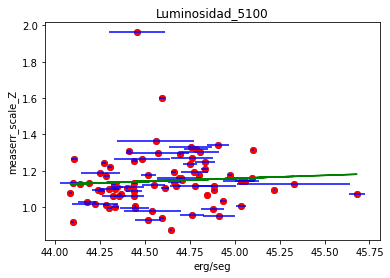

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_Z')
plt.savefig("Luminosidad_5100_measerr_scale_Z.pdf")

In [18]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.03339563]
 [1.        ]]
Intercepción: [-3.44945117e-01  2.13162821e-14]
Errorcuadratico medio : 0.011568833026185204
Raiz del error cuadratico medio:  0.10755850978042232
 Coeficiente de determinacion R2 :  0.5023656479186491
